#### Parameter Interdependance

This code implements a broad grid search for each parameter (or combination if interdependant) seperately. Then, if necessary, we repeat the grid searh, narrowing in on the minimum error and run time combinations. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import time
from tqdm import tqdm

from GA_params_class.GeneticAlgorithm import GeneticAlgorithm
from function_module import *

In [2]:
cnn_model_path = '../../Models/CNN_6_1_2.keras'
masked_sequence = 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTGGGCGGGAAGACAACTAGGGG'
target_expressions = [0, 0.5, 1]
precision = None
verbose = 0
test_cases = 10
lieages = 15

In [3]:
# Parameters for full factorial design testing
# Does not include pop_size, islands, gene_flow_rate, num_competitors, or boltzmann_temperature. Selection does not include 'boltzmann' (see 1_sub_params.ipynb)

param_ranges = {
    'generations' : np.linspace(50, 500, test_cases, dtype=int),
    'base_mutation_rate' : np.linspace(0.1, 1, test_cases, dtype=float),
    'chromosomes' : np.linspace(1, 30, test_cases, dtype=int), # The masked region is 30 nucleotides long. When chromosomes=30, each nucleotide is a chromosome
    'lineage_divergence_alpha' : np.linspace(0.1, 1, test_cases, dtype=float),
    'elitist_rate' : np.linspace(0.1, 1, test_cases, dtype=float),
    'surval_rate' : np.linspace(0.1, 1, test_cases, dtype=float),
    'num_parents' : np.linspace(1, 10, test_cases, dtype=int),
    'selection' : ['tournament', 'tournament_pop', 'roulette', 'linear_scaling', 'rank_based', 'sus', 'truncation'],
}

In [4]:
def test_params(param_range, param_name, iteration=1):
    results = []
    total_combinations = len(target_expressions) * len(param_range)
    progress_bar = tqdm(total=total_combinations, desc="Processing combinations", position=0)
    initial_time = time.time()

    for target_expression in target_expressions:
        for i, param_val in enumerate(param_range):
            # Dynamically set the dependent parameter using kwargs
            ga_kwargs = {
                param_name: param_val  # Add the parameter dynamically
            }
            ga = GeneticAlgorithm(
                cnn_model_path=cnn_model_path,
                pop_size=10,
                masked_sequence=masked_sequence,
                target_expression=target_expression,
                precision=precision,
                verbose=verbose,
                **ga_kwargs  # Pass dynamically created kwargs
            )
            # Time the run
            start_time = time.time()
            best_sequences, best_predictions = ga.run(lieages)
            end_time = time.time()

            # Record the results
            for sequence, prediction in zip(best_sequences, best_predictions):
                results.append({
                    'target_expression': target_expression,
                    'selection': 'tournament',
                    param_name: param_val,
                    'error': abs(prediction - target_expression),
                    'run_time': (end_time - start_time) / lieages
                })

            # Update progress bar
            progress_bar.update(1)
            elapsed_time = time.time() - initial_time
            eta = ((elapsed_time / (i+1)) * (total_combinations - (i+1)))
            if eta > 60:
                eta_message = f"{eta/60:.2f}min"
            else:
                eta_message = f"{eta:.2f}s"
            progress_bar.set_postfix({
                "Elapsed": f"{elapsed_time:.2f}s",
                "ETA": eta_message
            })

    # Close progress bar
    progress_bar.close()

    results_df = pd.DataFrame(results)
    results_df.to_csv(f'Data/individual_params/{param_name}_results_{iteration}.csv', index=False)
    return results_df

Processing combinations:   0%|          | 0/30 [00:00<?, ?it/s]c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Instructions for updating:
Use tf.identity with explicit device placement instead.


Processing combinations: 100%|██████████| 30/30 [25:44<00:00, 51.47s/it, Elapsed=1544.21s, ETA=51.47min] 


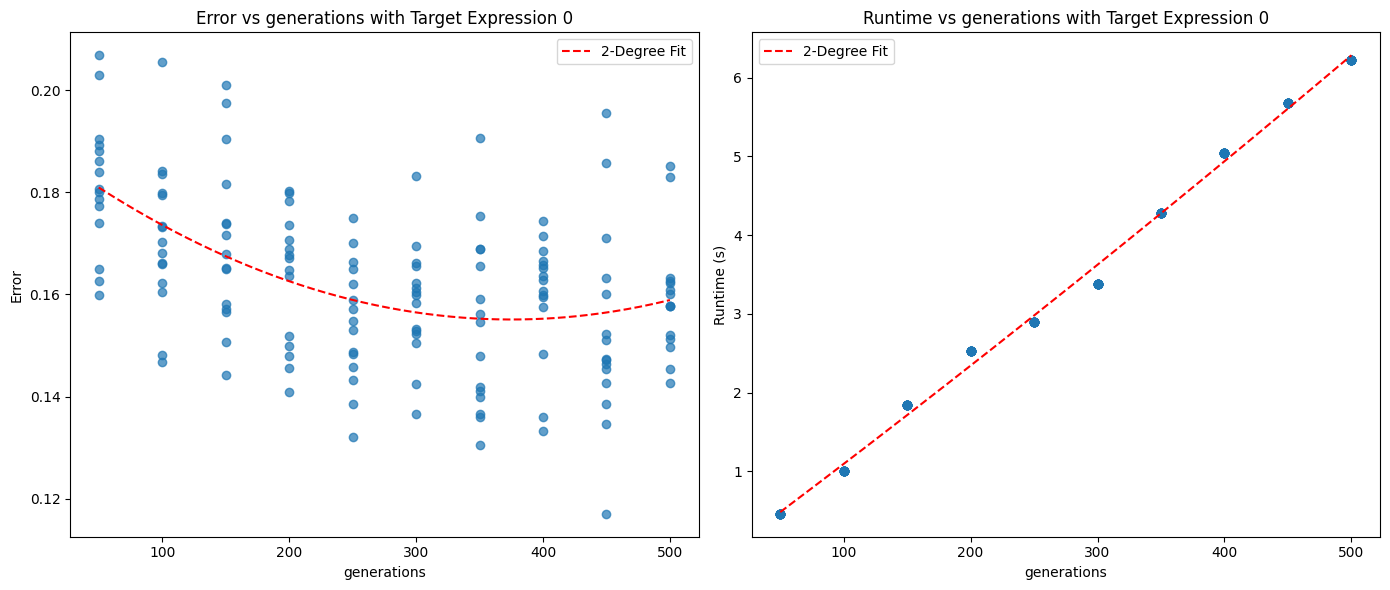

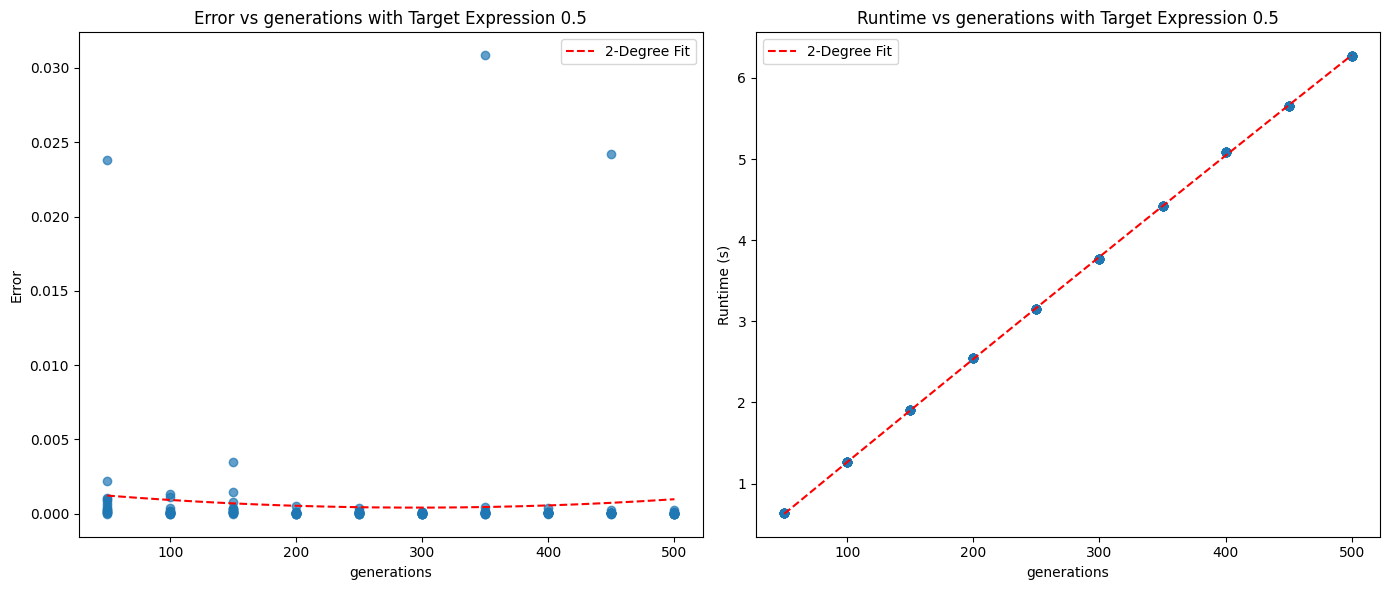

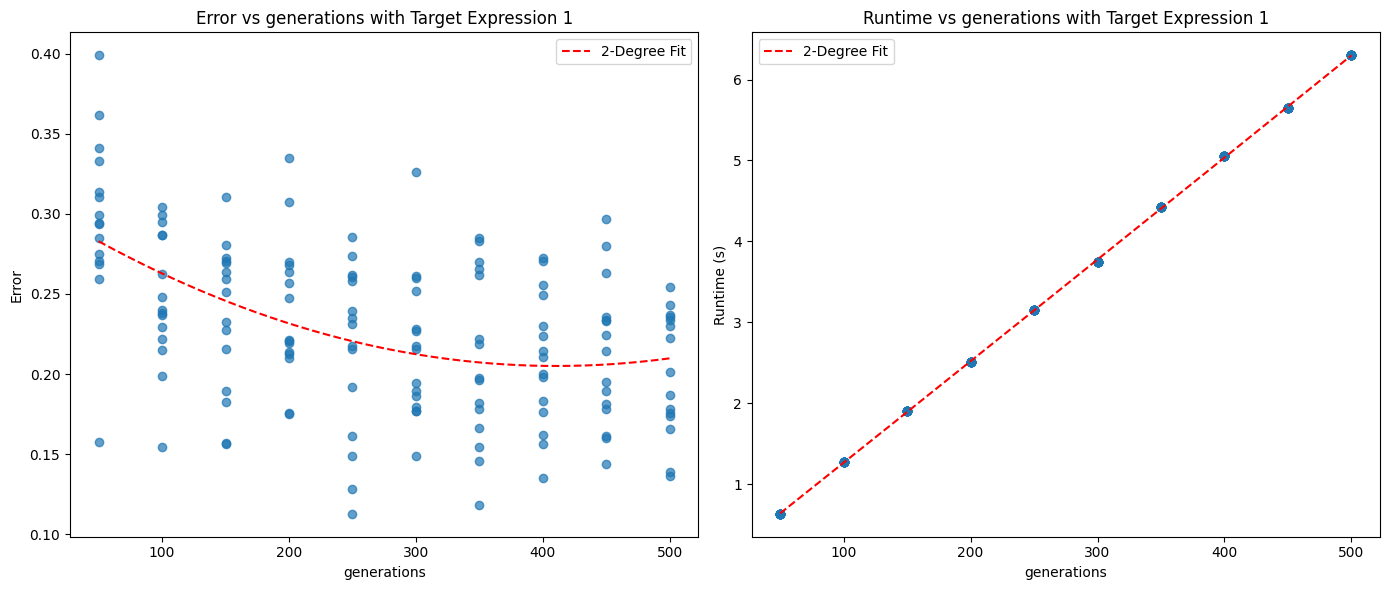

In [5]:
# Find optimal generations

results_df = test_params(param_ranges['generations'], 'generations')
for target_expression in target_expressions:
    filter_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filter_df, target_expression, 'generations', polynomial_degree=2)

Processing combinations: 100%|██████████| 30/30 [09:45<00:00, 19.52s/it, Elapsed=585.66s, ETA=19.52min] 


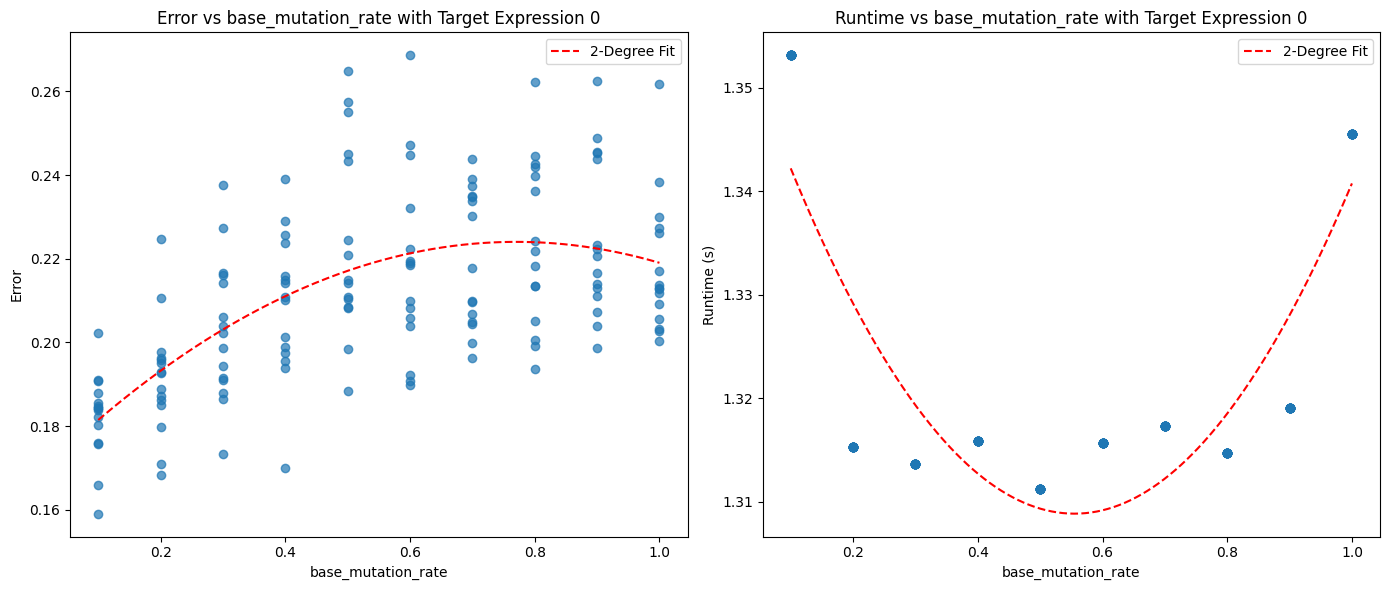

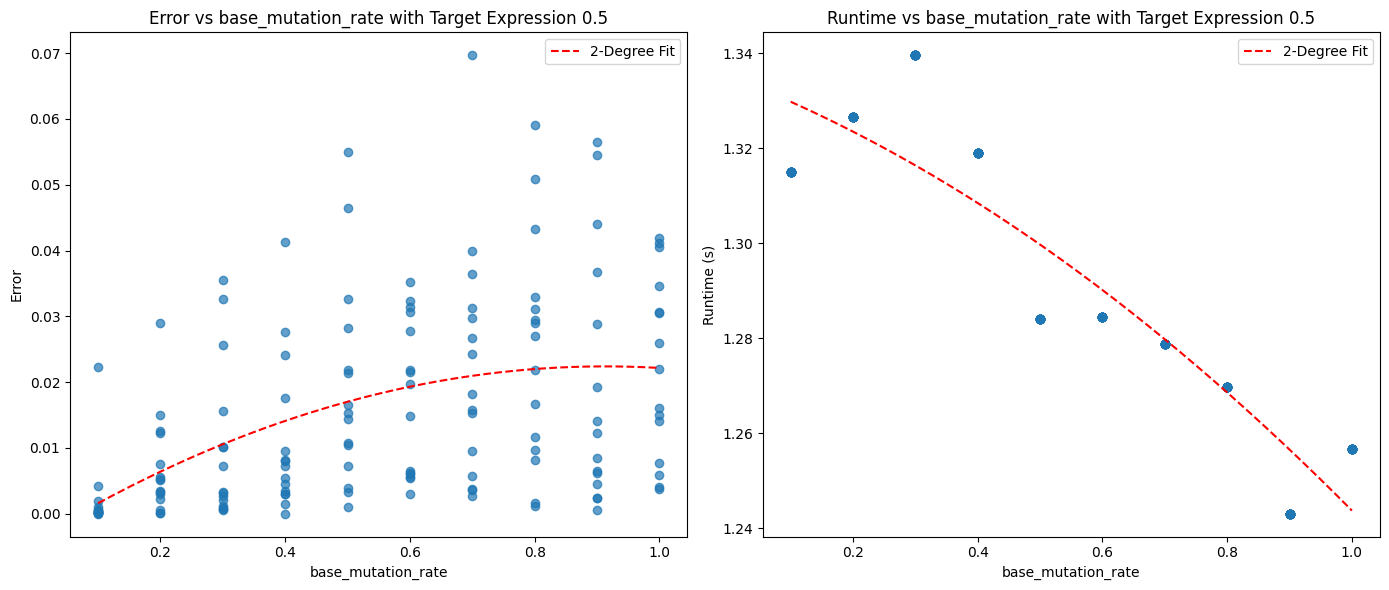

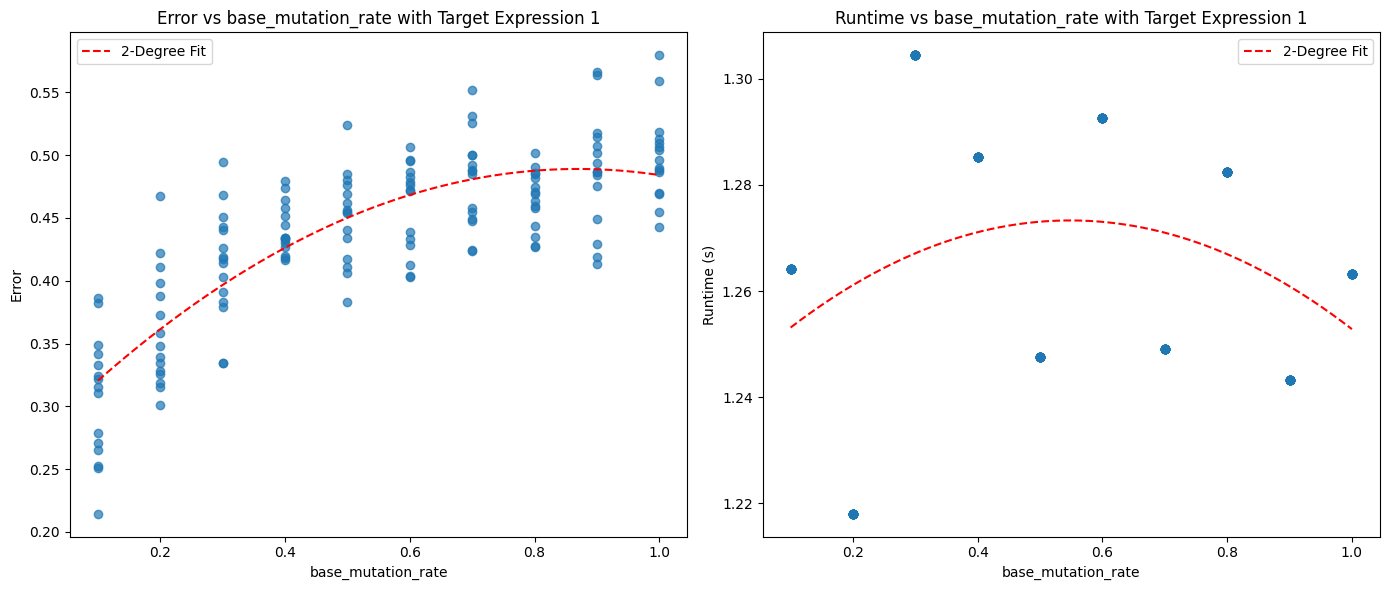

In [6]:
# Find optimal base_mutation_rate

results_df = test_params(param_ranges['base_mutation_rate'], 'base_mutation_rate')
for target_expression in target_expressions:
    filter_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filter_df, target_expression, 'base_mutation_rate', polynomial_degree=2)

Processing combinations: 100%|██████████| 30/30 [09:14<00:00, 18.49s/it, Elapsed=554.66s, ETA=18.49min] 


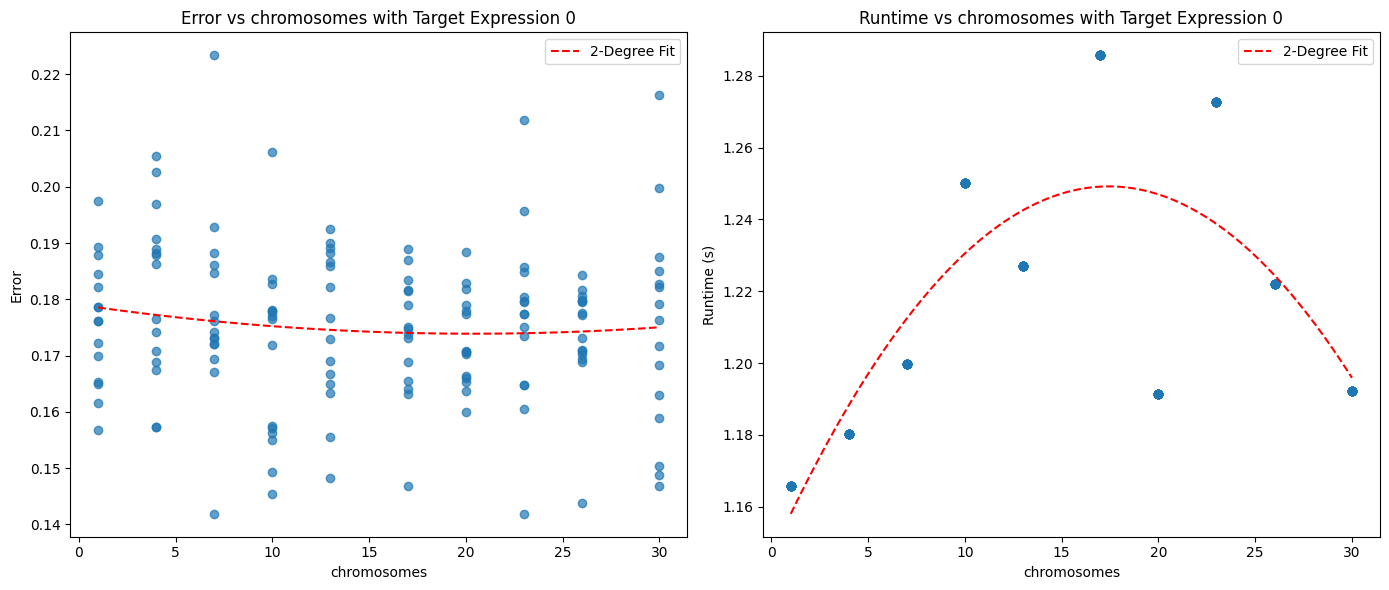

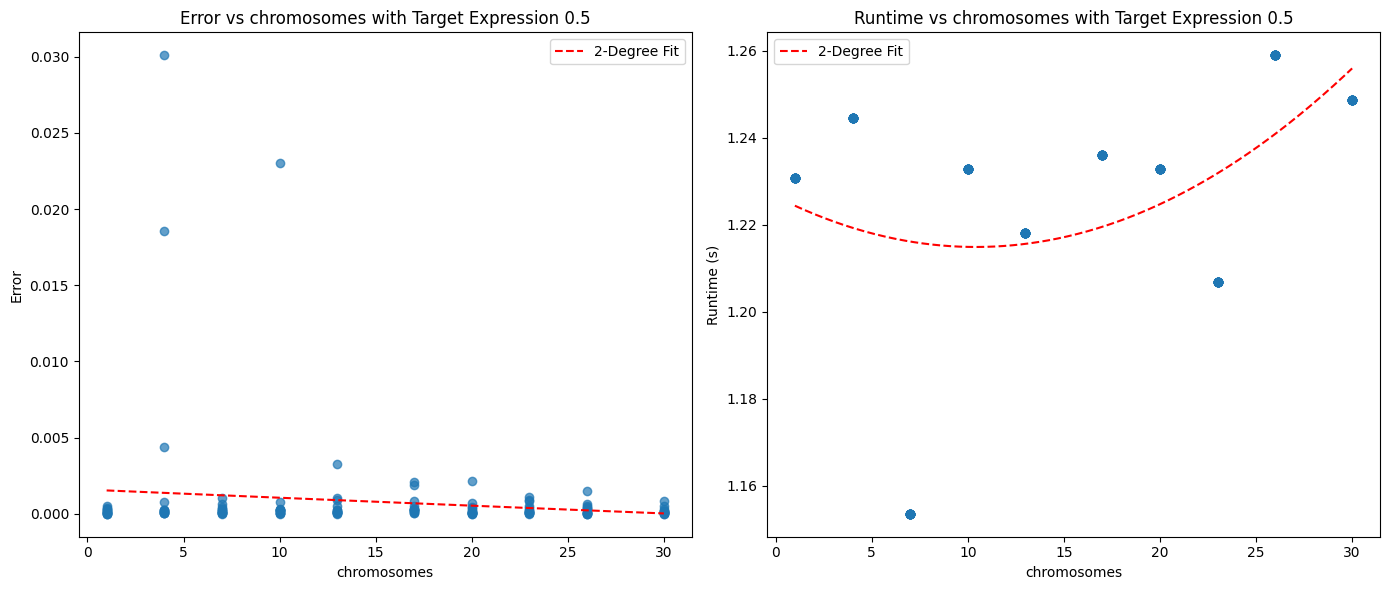

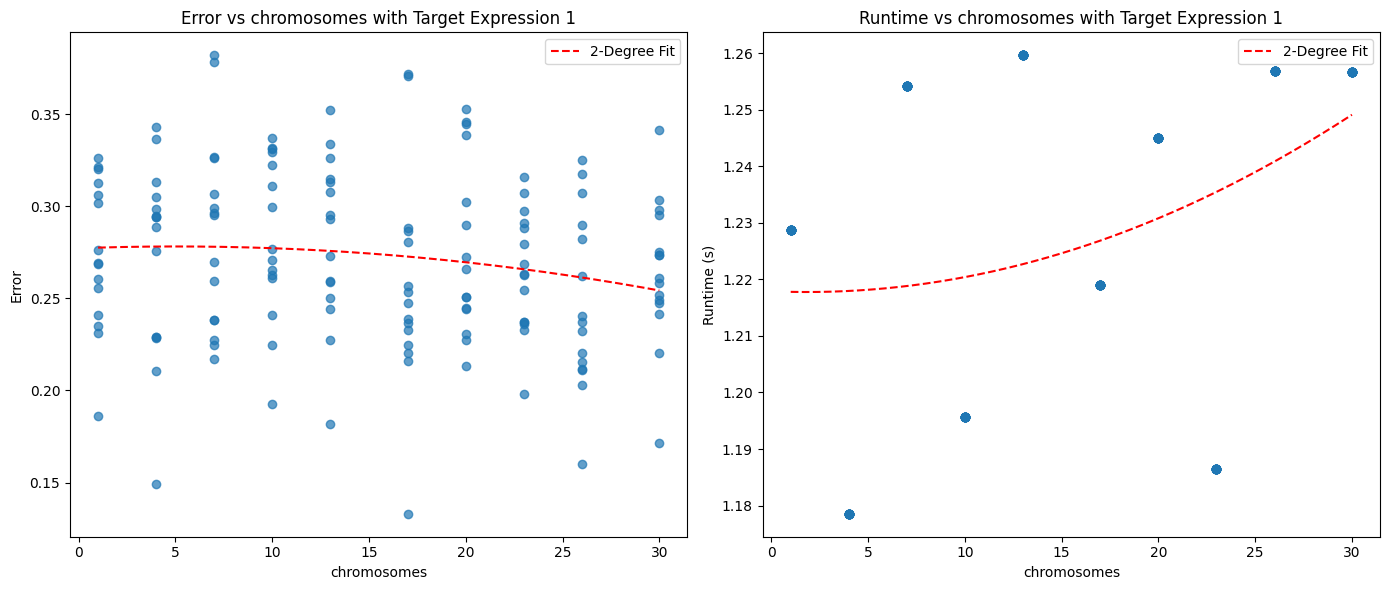

In [7]:
# Find optimal chromosomes

results_df = test_params(param_ranges['chromosomes'], 'chromosomes')
for target_expression in target_expressions:
    filter_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filter_df, target_expression, 'chromosomes', polynomial_degree=2)

Processing combinations: 100%|██████████| 30/30 [09:03<00:00, 18.13s/it, Elapsed=543.80s, ETA=18.13min] 


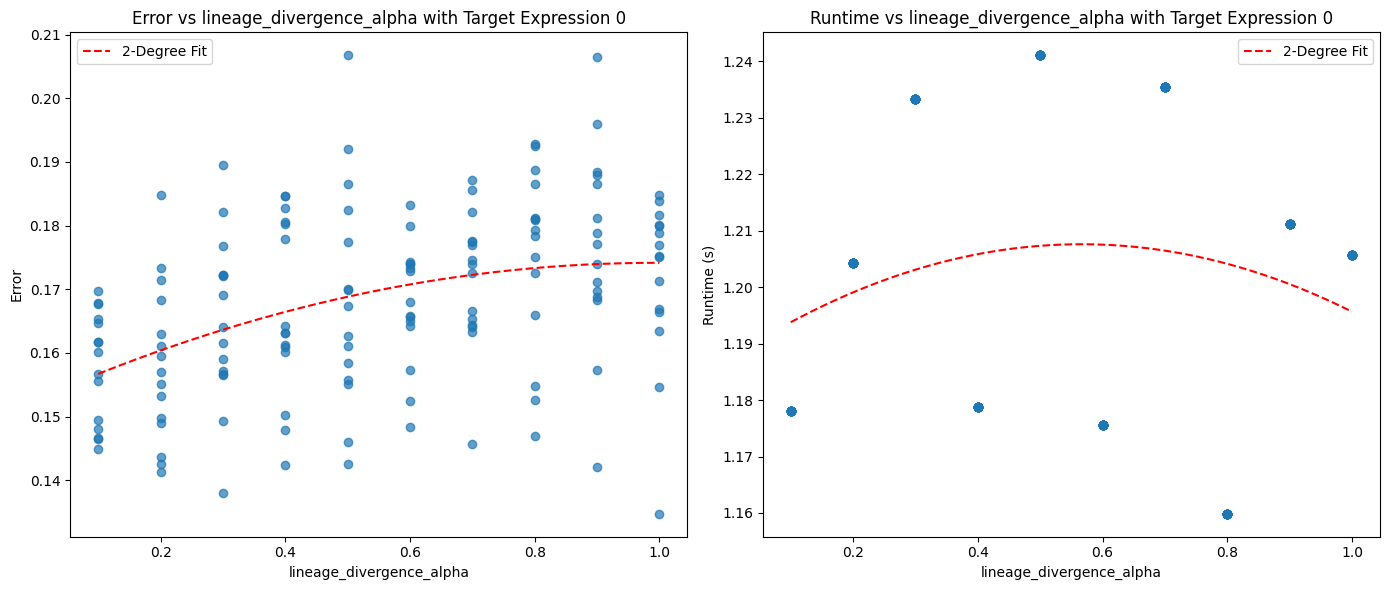

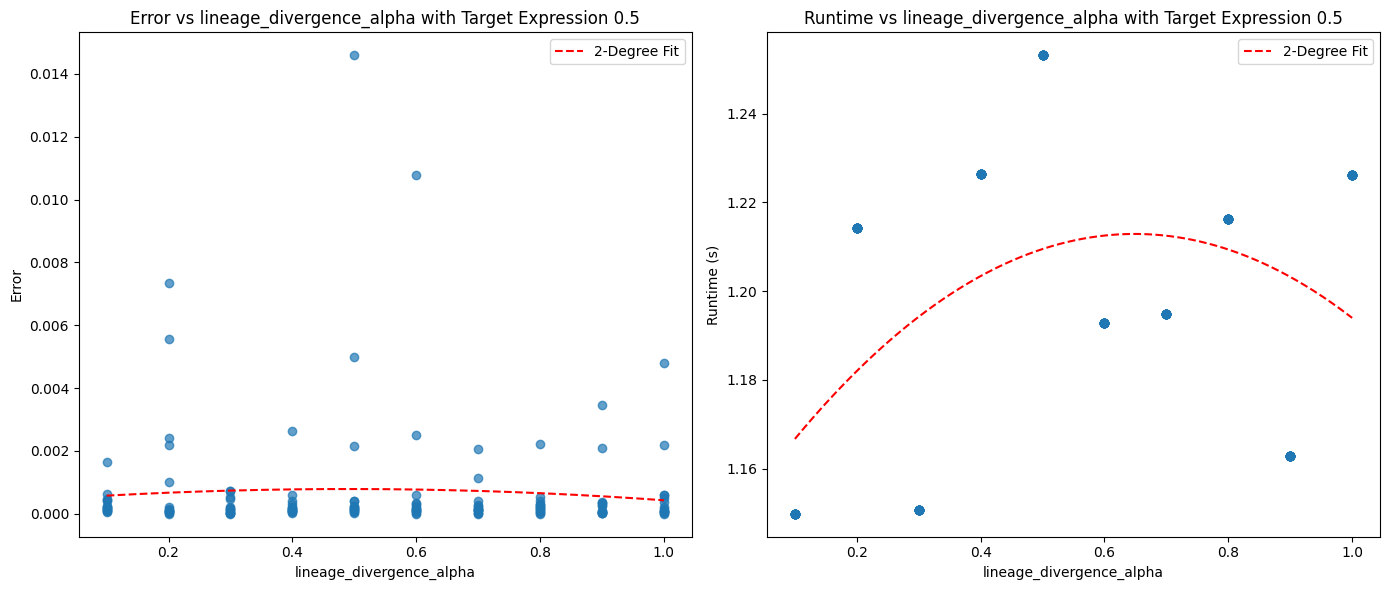

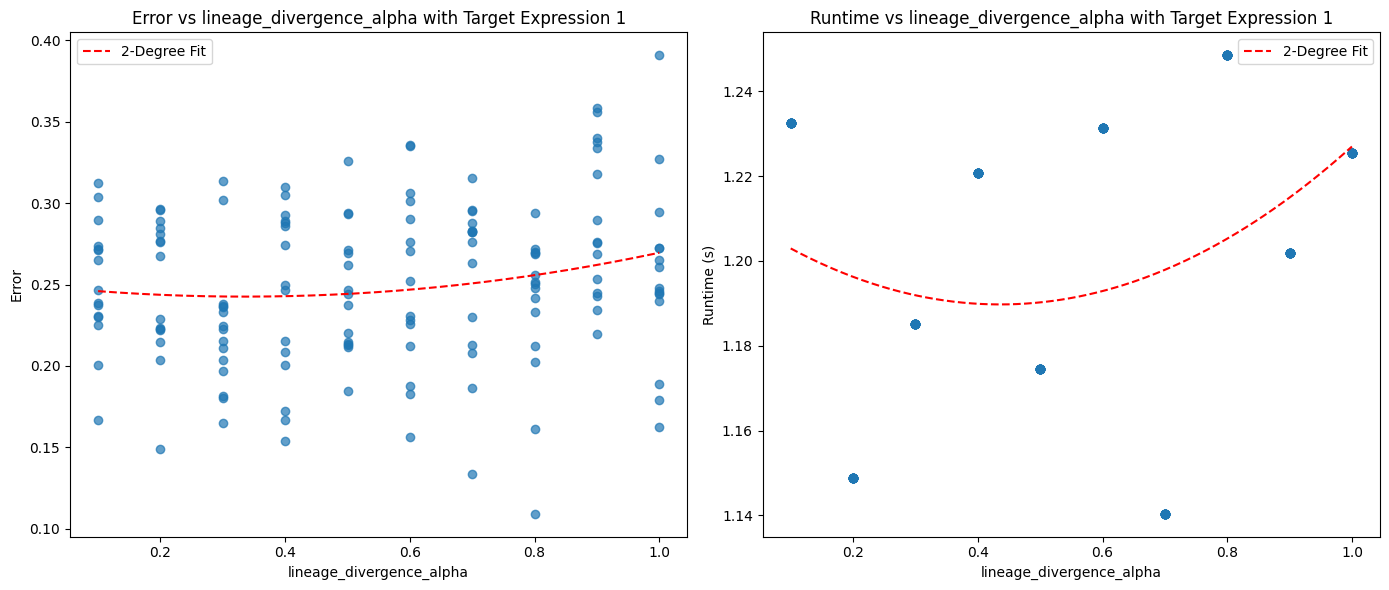

In [8]:
# Find optimal lineage_divergence_alpha

results_df = test_params(param_ranges['lineage_divergence_alpha'], 'lineage_divergence_alpha')
for target_expression in target_expressions:
    filter_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filter_df, target_expression, 'lineage_divergence_alpha', polynomial_degree=2)

Processing combinations: 100%|██████████| 30/30 [09:05<00:00, 18.19s/it, Elapsed=545.62s, ETA=18.19min] 


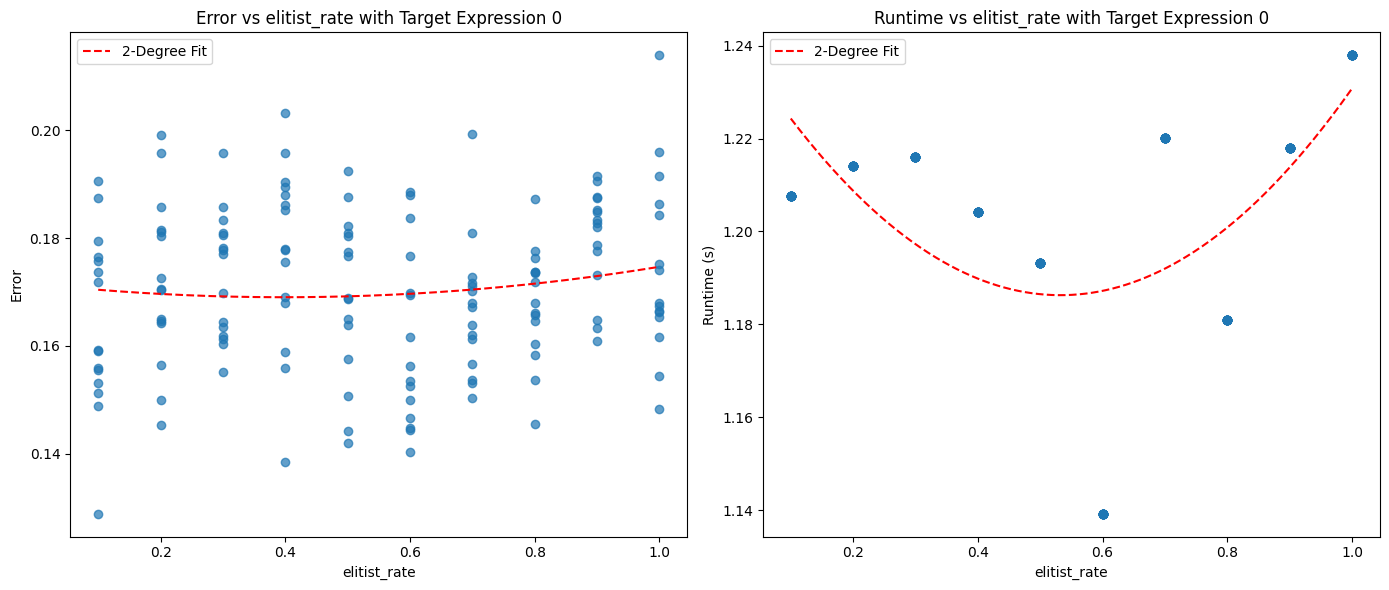

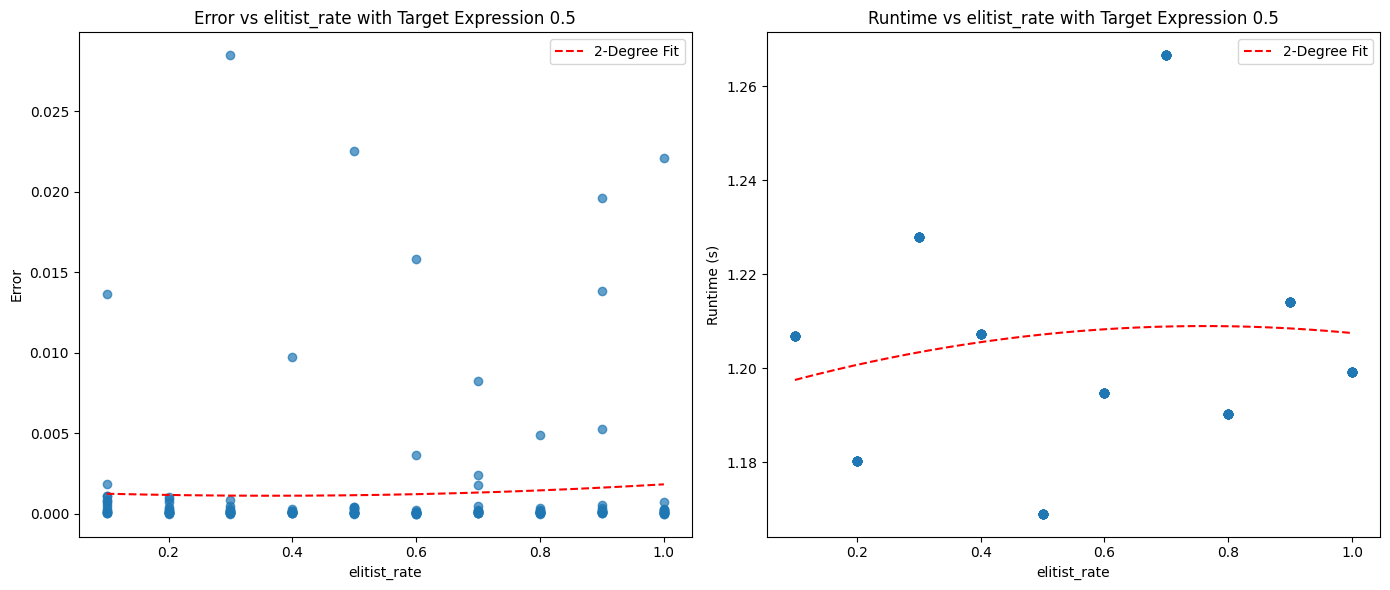

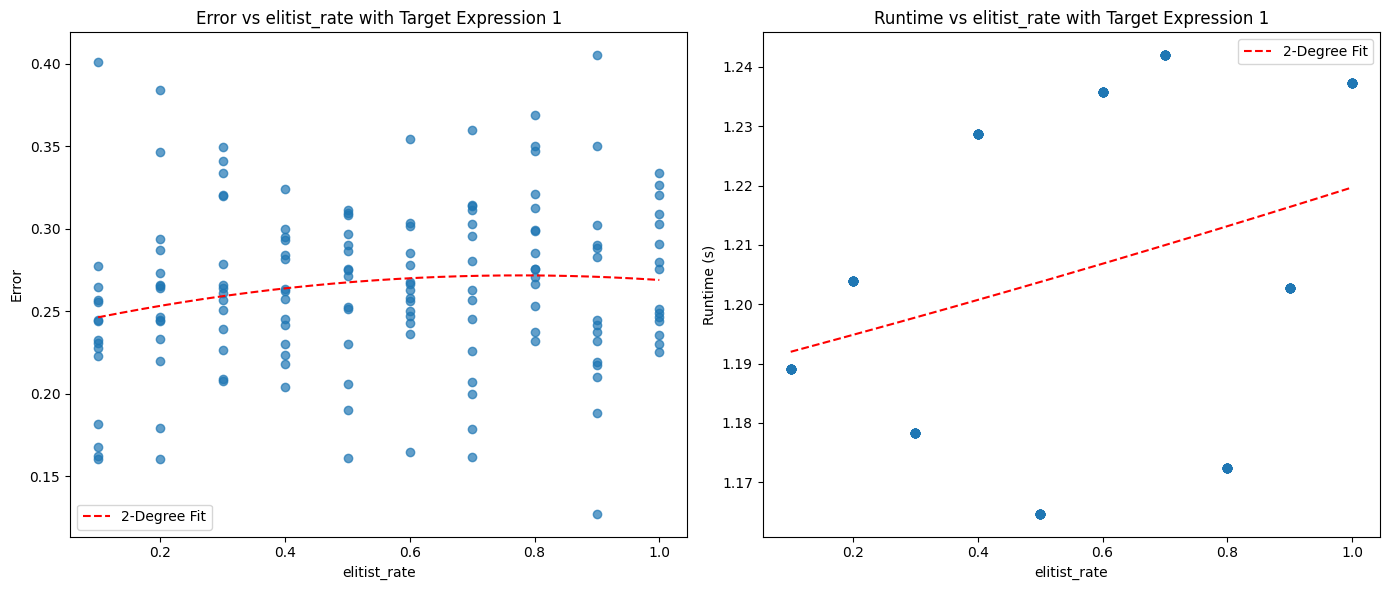

In [9]:
# Find optimal elitist_rate

results_df = test_params(param_ranges['elitist_rate'], 'elitist_rate')
for target_expression in target_expressions:
    filter_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filter_df, target_expression, 'elitist_rate', polynomial_degree=2)

Processing combinations: 100%|██████████| 30/30 [09:14<00:00, 18.48s/it, Elapsed=554.36s, ETA=18.48min] 


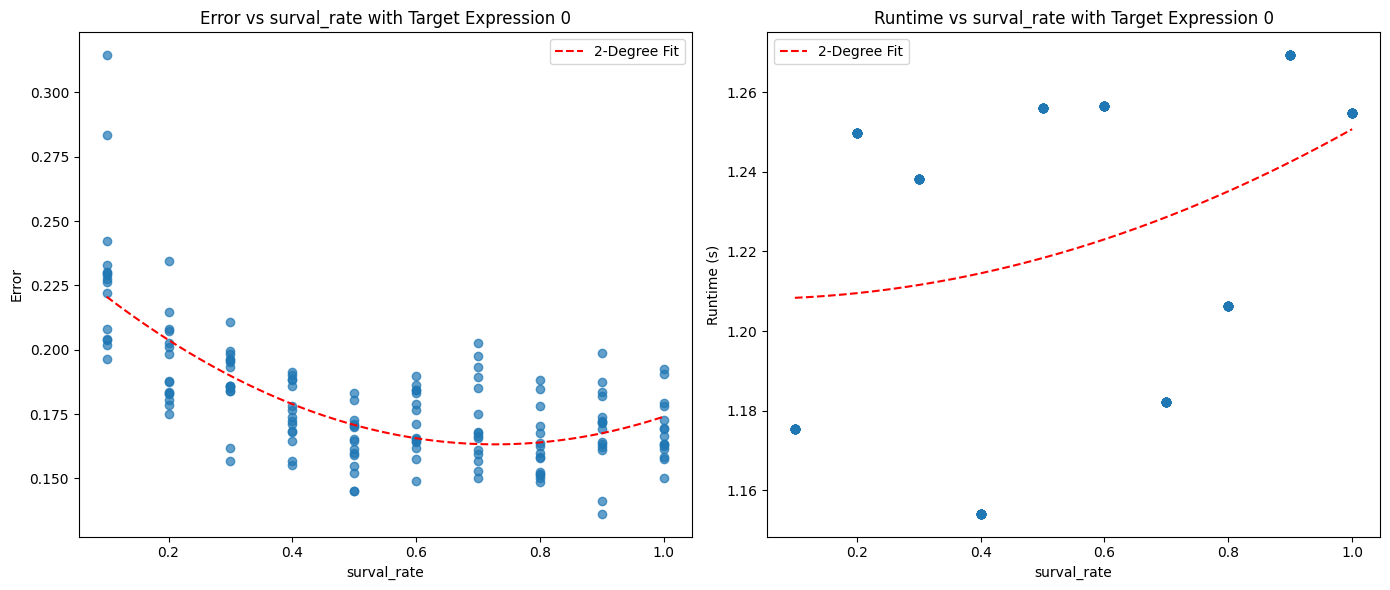

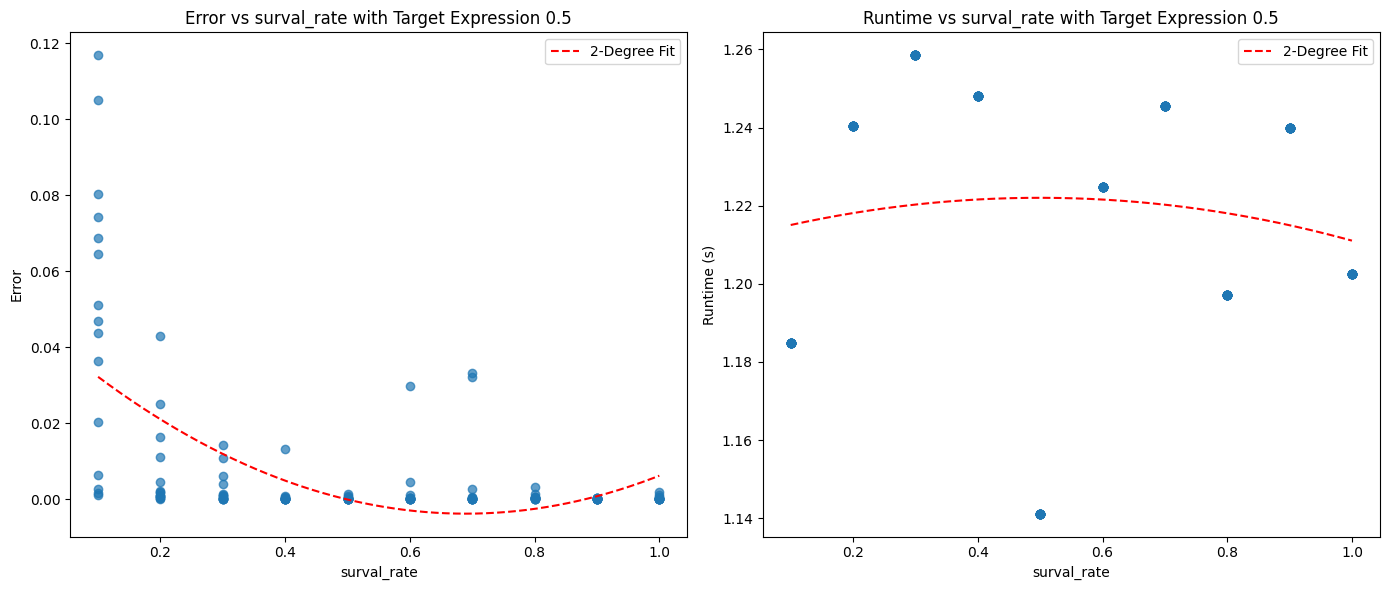

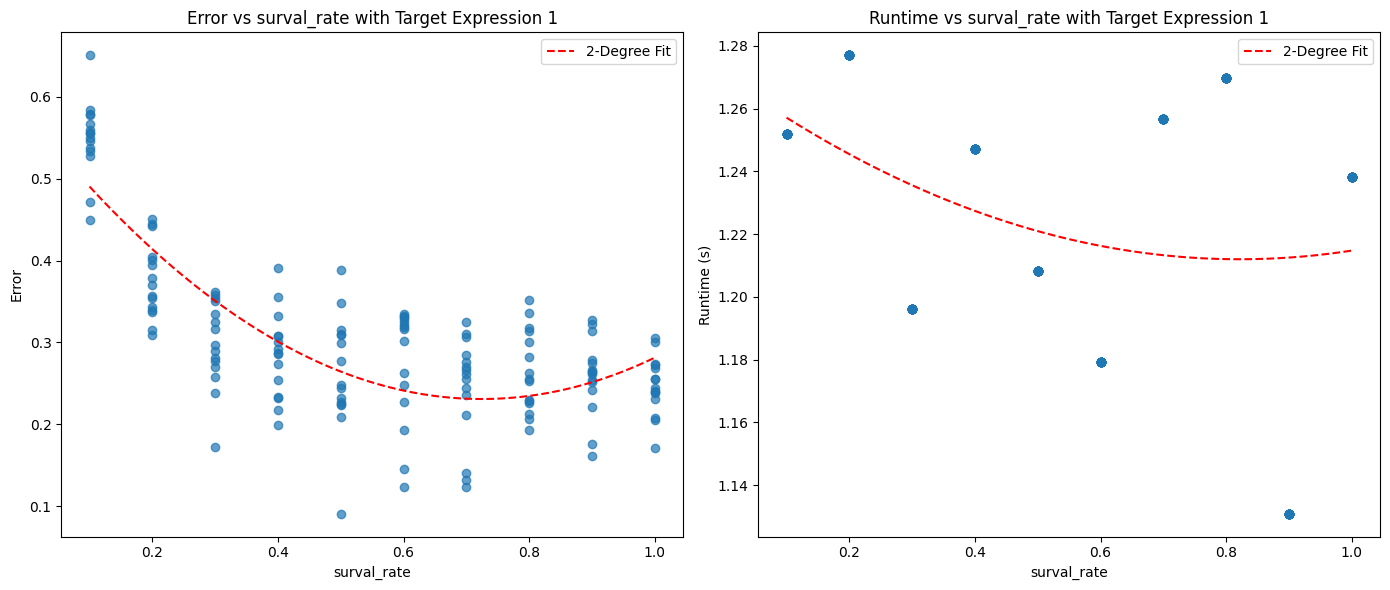

In [10]:
# Find optimal surval_rate

results_df = test_params(param_ranges['surval_rate'], 'surval_rate')
for target_expression in target_expressions:
    filter_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filter_df, target_expression, 'surval_rate', polynomial_degree=2)

Processing combinations: 100%|██████████| 30/30 [08:48<00:00, 17.62s/it, Elapsed=528.71s, ETA=17.62min] 


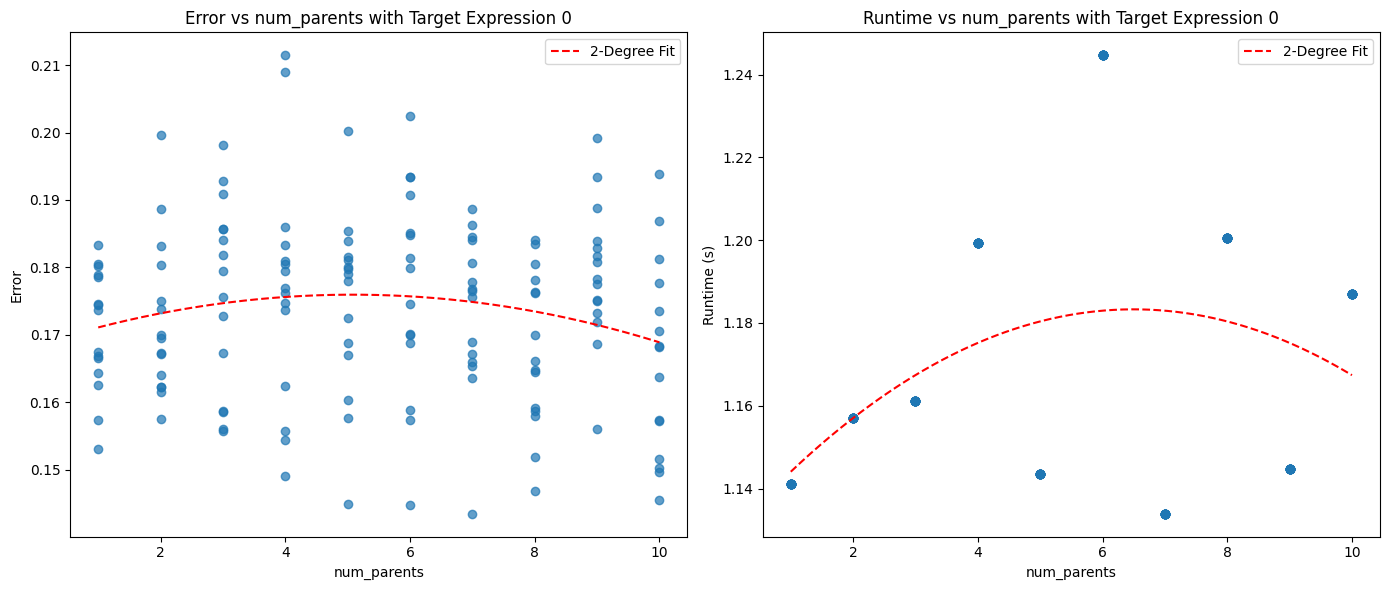

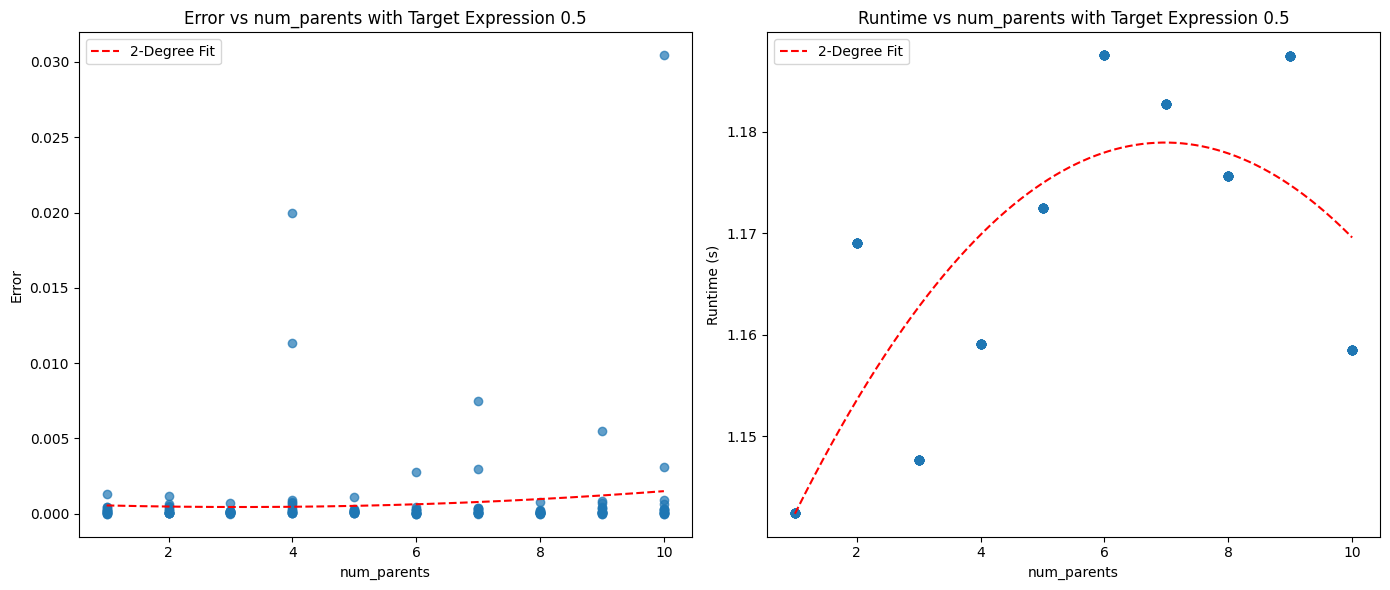

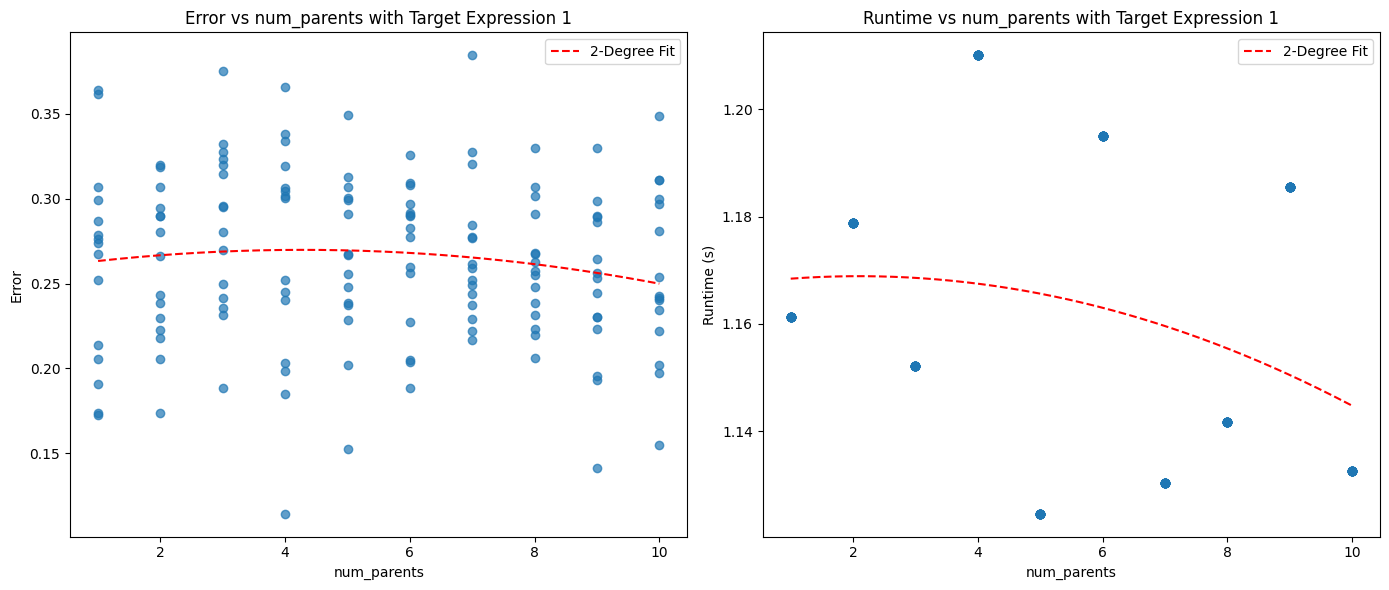

In [11]:
# Find optimal num_parents

results_df = test_params(param_ranges['num_parents'], 'num_parents')
for target_expression in target_expressions:
    filter_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filter_df, target_expression, 'num_parents', polynomial_degree=2)

Processing combinations: 100%|██████████| 21/21 [06:15<00:00, 17.86s/it, Elapsed=375.13s, ETA=12.50min]


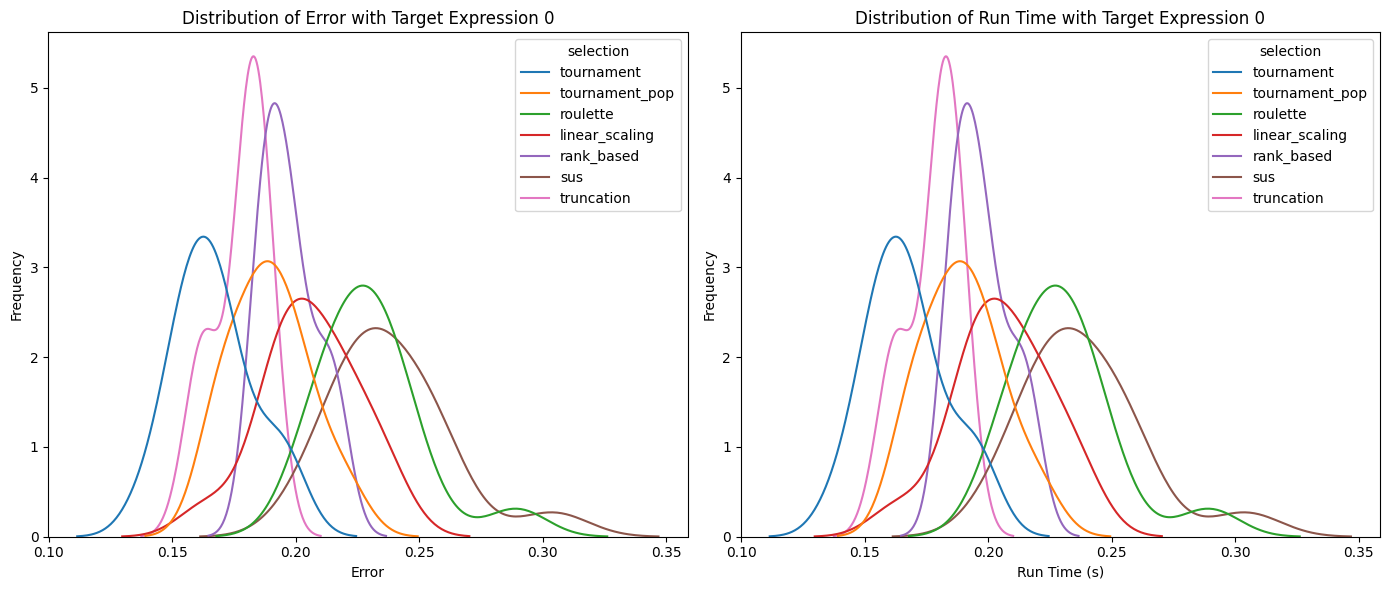

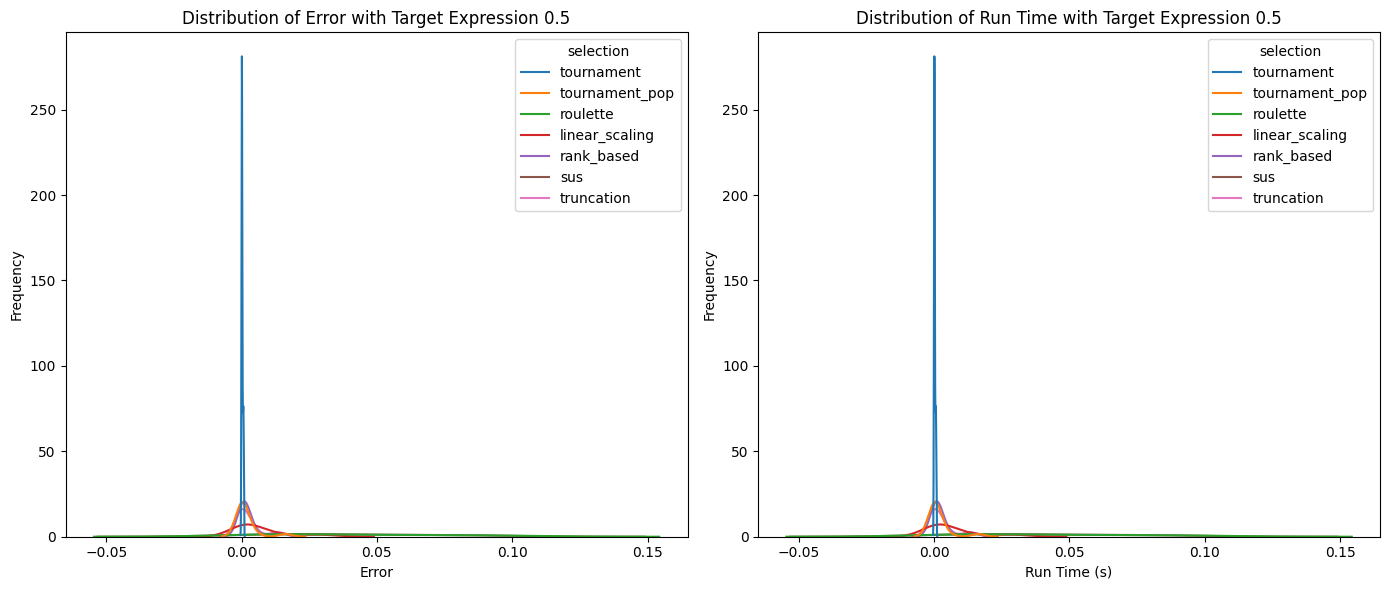

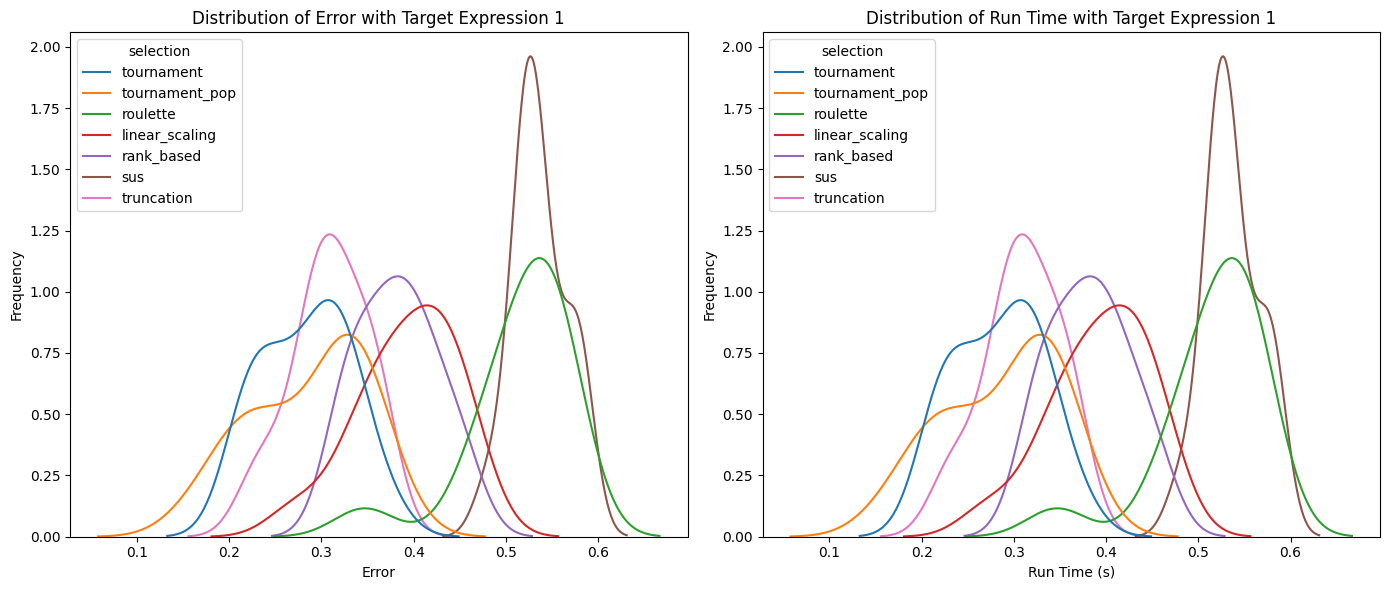

In [12]:
# Find optimal selection

results_df = test_params(param_ranges['selection'], 'selection')
for target_expression in target_expressions:
    filter_df = results_df[results_df['target_expression'] == target_expression]
    distribution_plot(filter_df, target_expression, 'selection')